### Q1:

In [250]:
import thinkdsp as td

class XY(td.Chirp):
    
    
    def evaluate(self, ts):
        
        l1, l2=  1.0/self.start, 1.0/self.end
        lengths= np.linspace(l1, l2, len(ts)-1)
        freqs=   1/lengths
        return self._evaluate(ts, freqs)


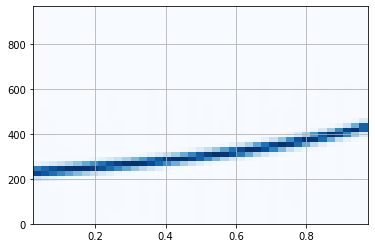

In [257]:
A3=  220 
A4=  440
s1= XY(start= A3, end= A4)
w1= s1.make_wave(duration=1)
w1.make_spectrogram(512).plot(high=1000)
w1.make_audio()

### Q2:

In [89]:
import thinkdsp as td

x= td.UncorrelatedGaussianNoise()
x= x.make_wave(duration= 1, framerate= 10000)
x

In [90]:
x.ts, x.ys
x.ys.shape

(10000,)

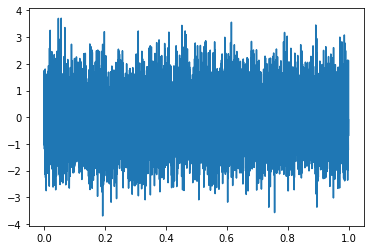

In [91]:
import matplotlib.pyplot as pl
pl.plot(x.ts, x.ys)


In [92]:
x.ys.max(), x.ys.mean(), x.ys.std()

(3.706034728922622, -0.013070657816582175, 1.0025501030383948)

In [95]:
sx= x.make_spectrum()
sx.fs, sx.hs 
sx.hs.shape

(5001,)

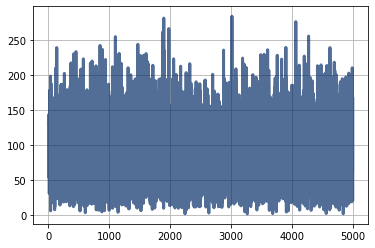

In [96]:
sx.plot()

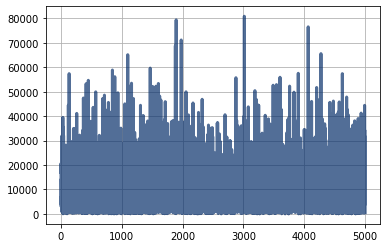

In [97]:
sx.plot_power()

In [100]:
Sx= sx.make_integrated_spectrum()
Sx.cs.shape

(5001,)

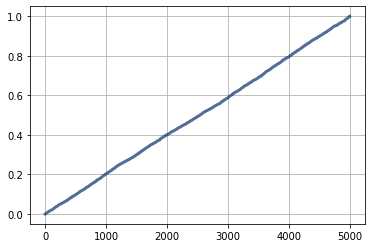

In [101]:
Sx.plot_power()

In [102]:
Sx.estimate_slope()

LinregressResult(slope=0.9862150803231964, intercept=-8.416376781219565, rvalue=0.9994736453890444, pvalue=0.0, stderr=0.00045279249960029975)

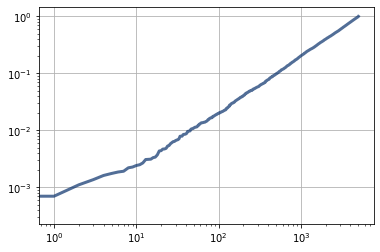

In [103]:
Sx.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [104]:
Sx.estimate_slope()

LinregressResult(slope=0.9862150803231964, intercept=-8.416376781219565, rvalue=0.9994736453890444, pvalue=0.0, stderr=0.00045279249960029975)

In [105]:
y= x.cumsum()
x.ys.shape, y.ys.shape

((10000,), (10000,))

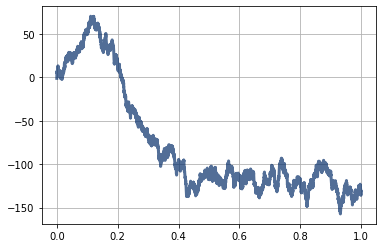

In [106]:
y.plot()

In [108]:
y.ys.max(), y.ys.mean(), y.ys.std()

(70.35717861246674, -76.9233897578204, 62.92925466714424)

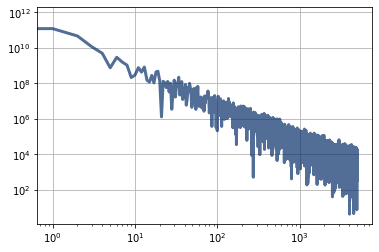

In [109]:
sy= y.make_spectrum()
sy.plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)


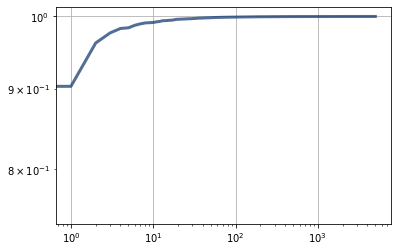

In [110]:
sy.make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')
pl.grid(True)

In [111]:
sy.make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.0005718402501891253, intercept=-0.004449672818712793, rvalue=0.3375354562055031, pvalue=1.7616356363096213e-133, stderr=2.2557510407220237e-05)

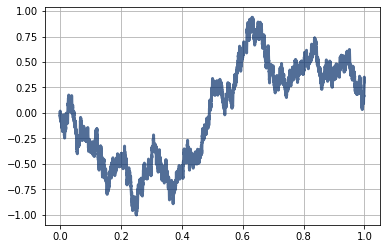

In [112]:
z= td.BrownianNoise().make_wave(duration=1, framerate=10000)
z.plot()

In [113]:
z.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.0020285715992482667, intercept=-0.015881052041637783, rvalue=0.5014539582932107, pvalue=0.0, stderr=4.950736330578844e-05)

### Q3:

In [114]:
aUrl= 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df= pd.read_csv(aUrl)


In [115]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23188,2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


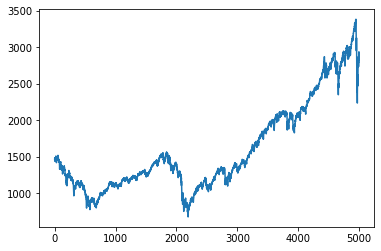

In [118]:
ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [119]:
yWave= td.Wave(ys, framerate= 10000)


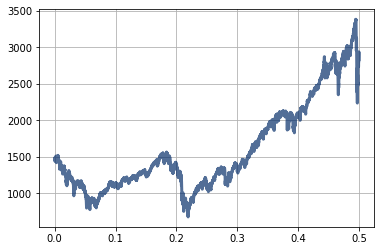

In [120]:
yWave.plot()

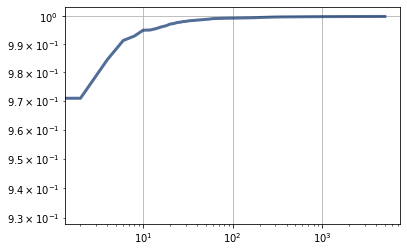

In [126]:
yWave.make_spectrum().make_integrated_spectrum().plot_power()
pl.xscale('log')
pl.yscale('log')

In [127]:
yWave.make_spectrum().make_integrated_spectrum().estimate_slope()

LinregressResult(slope=0.00032118267557806565, intercept=-0.0025138728815941023, rvalue=0.42786931354255375, pvalue=7.735021238915467e-112, stderr=1.3574898947827898e-05)

In [ ]:
# integrated_spectrum 之 log-log slope= 0.0003 近似於 0，
#  yWave 近似Brownian Noise